In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import pandas as pd
from nltk.corpus import stopwords
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings
import nltk
warnings.filterwarnings('ignore')


data = pd.read_csv("C:/Users/heave/Project/data/question1_sentiment.csv" )#,header=0, delimiter="\t", quoting=3
#df_train.head()
#print(data.info())
#DataFrame(data.head())
#data.head()
#print(data.describe())
#print(data)

#data["review"].head()

#data = data.rename(columns = {'id':'a' , 'label':'b' , 'review':'c'}) #列名重命名

#df_train为训练集
df_train = data.head (n = 20000)
print(df_train)



          id  label                                             review
0          1      1  With all this stuff going down at the moment w...
1          2      1  \The Classic War of the Worlds\" by Timothy Hi...
2          3      0  The film starts with a manager (Nicholas Bell)...
3          4      0  It must be assumed that those who praised this...
4          5      1  Superbly trashy and wondrously unpretentious 8...
5          6      1  I dont know why people think this is such a ba...
6          7      0  This movie could have been very good, but come...
7          8      0  I watched this video at a friend's house. I'm ...
8          9      0  A friend of mine bought this film for £1, and ...
9         10      1  <br /><br />This movie is full of references. ...
10        11      0  What happens when an army of wetbacks, towelhe...
11        12      1  Although I generally do not like remakes belie...
12        13      1  \Mr. Harvey Lights a Candle\" is anchored by a...
13    

In [3]:
#df_test = pd.read_csv("C:/Users/heave/Project/Machine-learning-and-Data-mining/data/question1_sentiment.csv")

#df_test为测试集
df_test = data.tail(n = 10000)
print(df_test)

          id  label                                             review
15000  15001      1  Father of the Pride was the best new show to h...
15001  15002      0  I had been looking forward to seeing Dreamgirl...
15002  15003      0  I gave this loooooooooooong film a \2\" becaus...
15003  15004      1  what is wrong with you people, if you weren't ...
15004  15005      1  My parents took me to this movie when I was ni...
15005  15006      0  If you haven't seen this yet, I say just move ...
15006  15007      1  An MGM MINIATURE Short Subject.<br /><br />The...
15007  15008      0  The only possible way to enjoy this flick is t...
15008  15009      1  New York, I Love You is a collective work of e...
15009  15010      1  A lovely old - fashioned thriller coming on li...
15010  15011      0  From watching only the trailer to Theodore Rex...
15011  15012      0  Tim Robbins and John Cusack are two actors I h...
15012  15013      1  I have no idea how to describe this movie, and...
15013 

In [4]:

#data["review"].head()
#data.to_csv('cleanfile.csv' encoding='utf-8') #数据保存

df_train.review = df_train.review.str.lower()
df_train.review = df_train.review.str.strip()
#data.dropna() #删除包含NA的不完整的行
#data.dropna(subset=['review'])
#data.review.head()

In [5]:
from bs4 import BeautifulSoup
nltk.download("stopwords")

def review_to_words( raw_review ):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review, 'lxml').get_text() 
    
    # 2. Remove non-letters with regex
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                           
    
    # 4. Create set of stopwords
    stops = set(stopwords.words("english"))                  
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))   

df_train["review"]=df_train["review"].apply(review_to_words)
#df_test.dropna()
df_train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,label,review
0,1,1,stuff going moment mj started listening music ...
1,2,1,classic war worlds timothy hines entertaining ...
2,3,0,film starts manager nicholas bell giving welco...
3,4,0,must assumed praised film greatest filmed oper...
4,5,1,superbly trashy wondrously unpretentious explo...


In [6]:
df_test['review']=df_test['review'].apply(review_to_words)

#data.dropna() #删除包含NA的不完整的行
df_test.head()

,id,label,review
15000,15001,1,father pride best new show hit television sinc...
15001,15002,0,looking forward seeing dreamgirls quite raving...
15002,15003,0,gave loooooooooooong film attractive actors se...
15003,15004,1,wrong people blown away action car sequences j...
15004,15005,1,parents took movie nine years old never forgot...


In [7]:
df_train.isnull().sum(),df_test.isnull().sum()


(id        0
 label     0
 review    0
 dtype: int64, id        0
 label     0
 review    0
 dtype: int64)

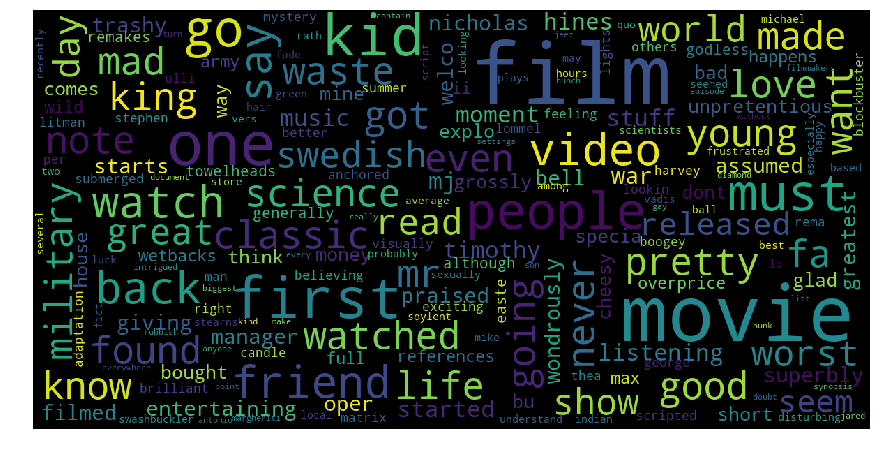

In [8]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df_train["review"])

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

Using TensorFlow backend.


In [17]:
list_classes = ["label"]
y = df_train[list_classes].values
list_sentences_train = df_train["review"]
list_sentences_test = df_test["review"]

In [18]:
max_features = 6000
tokenizer = Tokenizer(num_words=max_features)   #分词器最大化6000字 利用Kelas函数进行标记化和填充的预处理
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

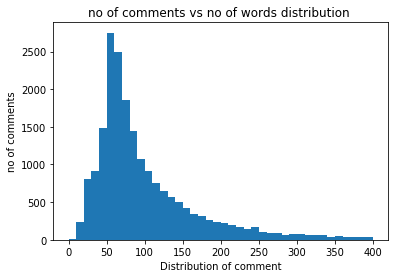

In [19]:
#字长分布检验
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.xlabel("Distribution of comment")
plt.ylabel("no of comments")
plt.title("no of comments vs no of words distribution ")
plt.show()

In [20]:
maxlen = 370
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [21]:
inp = Input(shape=(maxlen, ))
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

In [22]:
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [23]:
batch_size = 32
epochs = 2
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/2
16000/16000 [==============================] - 151s 9ms/step - loss: 0.4031 - acc: 0.8115 - val_loss: 0.2974 - val_acc: 0.8758
Epoch 2/2
16000/16000 [==============================] - 156s 10ms/step - loss: 0.2283 - acc: 0.9102 - val_loss: 0.3060 - val_acc: 0.8702


In [38]:
#验证集
df_verify = df_test.head(n = 5000)
del df_verify['review']
del df_verify['id']


print(df_verify.head())
print("count=",len(df_verify))

       label
15000      1
15001      0
15002      0
15003      1
15004      1
count= 5000


In [40]:
#预测结果
prediction = model.predict(X_te)
print (prediction)
print(len(prediction))

[[0.93239677]
 [0.0864502 ]
 [0.09367383]
 ...
 [0.66555905]
 [0.05136078]
 [0.9878328 ]]
10000


In [75]:
#中间结果输出
pre_output = df_test.tail(n= 5000)
del pre_output['review']
pre_output['label'] = prediction[range(5000,10000)]
print(pre_output)

pre_output.to_csv("C:/Users/heave/Project/submission_1.csv",index=False)

          id     label
20000  20001  0.919656
20001  20002  0.650700
20002  20003  0.992861
20003  20004  0.814771
20004  20005  0.182021
20005  20006  0.658124
20006  20007  0.001662
20007  20008  0.132718
20008  20009  0.312299
20009  20010  0.047502
20010  20011  0.971798
20011  20012  0.035600
20012  20013  0.341755
20013  20014  0.249129
20014  20015  0.003538
20015  20016  0.072217
20016  20017  0.969290
20017  20018  0.983735
20018  20019  0.269444
20019  20020  0.016009
20020  20021  0.169655
20021  20022  0.004247
20022  20023  0.966571
20023  20024  0.014849
20024  20025  0.038855
20025  20026  0.967200
20026  20027  0.032739
20027  20028  0.777346
20028  20029  0.942506
20029  20030  0.961595
...      ...       ...
24970  24971  0.985634
24971  24972  0.868245
24972  24973  0.972229
24973  24974  0.007892
24974  24975  0.866102
24975  24976  0.963141
24976  24977  0.068971
24977  24978  0.816698
24978  24979  0.989890
24979  24980  0.970651
24980  24981  0.142689
24981  2498

In [58]:
#将结果整理
df_pred = (prediction > 0.5)
print(df_pred)
print(len(df_pred))

[[ True]
 [False]
 [False]
 ...
 [ True]
 [False]
 [ True]]
10000


In [63]:
 #df_test["label"] = df_test["id"].map(lambda x: 1 if int(x.strip('"').split("_")[1]) >= 5 else 0)
# df_test["label"] = df_test["id"].map(lambda x: 1 if x >= 5 else 0)

#测试验证集
y_verify = df_pred[range(0,5000)]
print(y_verify)
print("count=" , len(y_verify))


#结果集
y_pred = df_pred[range(5000,10000)]
print(y_pred)
print("count=" , len(y_pred))




[[ True]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]
count= 5000
[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [False]
 [ True]]
count= 5000


In [64]:
from sklearn.metrics import f1_score, confusion_matrix
print('F1-score: {0}'.format(f1_score(df_verify, y_verify)))
print('Confusion matrix:')
confusion_matrix(df_verify, y_verify)  #输出混淆矩阵

F1-score: 0.888844382134989
Confusion matrix:


array([[2226,  289],
       [ 266, 2219]], dtype=int64)

In [65]:
y_pred =y_pred.astype('int')
print(y_pred)


[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [70]:
# ouput submission file 
#df_test = df_test[['id','label']]

#输出结果
output = df_test.tail(n= 5000)
del output['review']
output['label'] = y_pred
print(output)

          id  label
20000  20001      1
20001  20002      1
20002  20003      1
20003  20004      1
20004  20005      0
20005  20006      1
20006  20007      0
20007  20008      0
20008  20009      0
20009  20010      0
20010  20011      1
20011  20012      0
20012  20013      0
20013  20014      0
20014  20015      0
20015  20016      0
20016  20017      1
20017  20018      1
20018  20019      0
20019  20020      0
20020  20021      0
20021  20022      0
20022  20023      1
20023  20024      0
20024  20025      0
20025  20026      1
20026  20027      0
20027  20028      1
20028  20029      1
20029  20030      1
...      ...    ...
24970  24971      1
24971  24972      1
24972  24973      1
24973  24974      0
24974  24975      1
24975  24976      1
24976  24977      0
24977  24978      1
24978  24979      1
24979  24980      1
24980  24981      0
24981  24982      1
24982  24983      0
24983  24984      1
24984  24985      0
24985  24986      0
24986  24987      1
24987  24988      1


In [71]:
output.to_csv("C:/Users/heave/Project/question1_submission.csv",index=False)

In [73]:
output.to_csv("C:/Users/heave/Project/question1_submission.txt",index=False)